In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Load dataframe for EDA from cleaned data
df_impute = pd.read_csv('data/df_impute.csv')

### EDA - Univariate

In [22]:
# Drop indentifying columns
desired_columns = df_impute.columns[~df_impute.columns.isin(['Unnamed: 0','seqn'])]
EDA_df = df_impute[desired_columns]

In [24]:
# Get an overview of the dataframe
EDA_df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,5400.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [28]:
EDA_df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,49.796896,4095.481515,98.337152,28.671794,0.161114,46.251004,5.510497,108.515746,53.617070,126.976267,0.346874
std,17.602960,2937.938368,16.009686,6.624965,0.432750,269.742507,1.444166,34.369967,15.152825,89.538790,0.476084
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,35.000000,1600.000000,87.000000,24.000000,0.000000,4.510000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,50.000000,3500.000000,97.000000,27.600000,0.000000,7.140000,5.400000,100.000000,51.000000,103.000000,0.000000
75%,64.000000,6200.000000,107.200000,32.000000,0.000000,13.995000,6.400000,110.000000,62.000000,149.000000,1.000000
max,80.000000,9000.000000,170.500000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1311.000000,1.000000


Show distributions of all attributes in the dataset

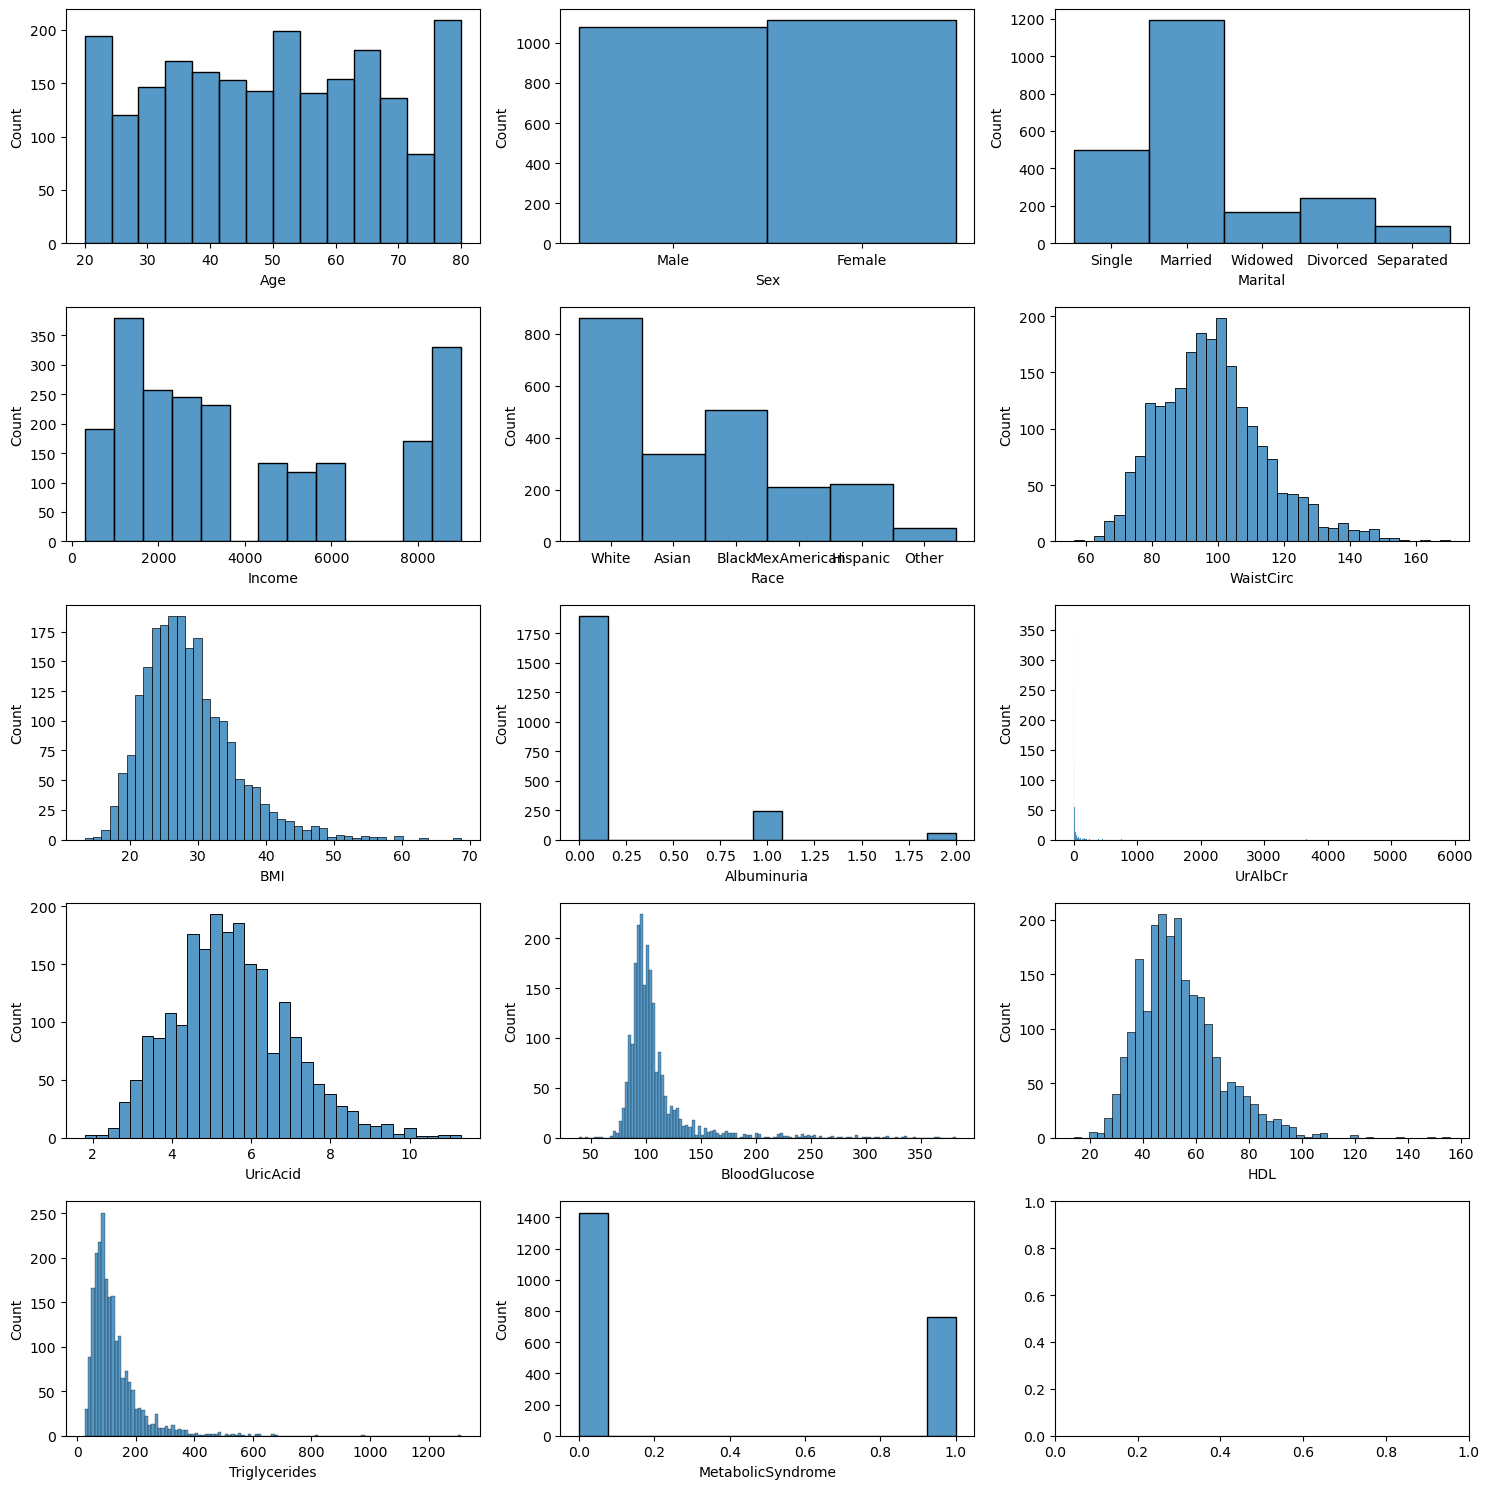

In [27]:
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.columns):
    sns.histplot(EDA_df[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

We can observe the following:
* `MetabolicSyndrome` and `Albuminuria` are both discrete attributes
* The data is evenly split between male and female respondents
* The `Income` seems like a trimodal distribution
* The `Age` of the respondents are almost uniformly distributed
* There are very significant outliers in `UrAlbCr` attribute, which should be better visualized in the boxplots to follow

Show boxplots for the attributes in the dataset

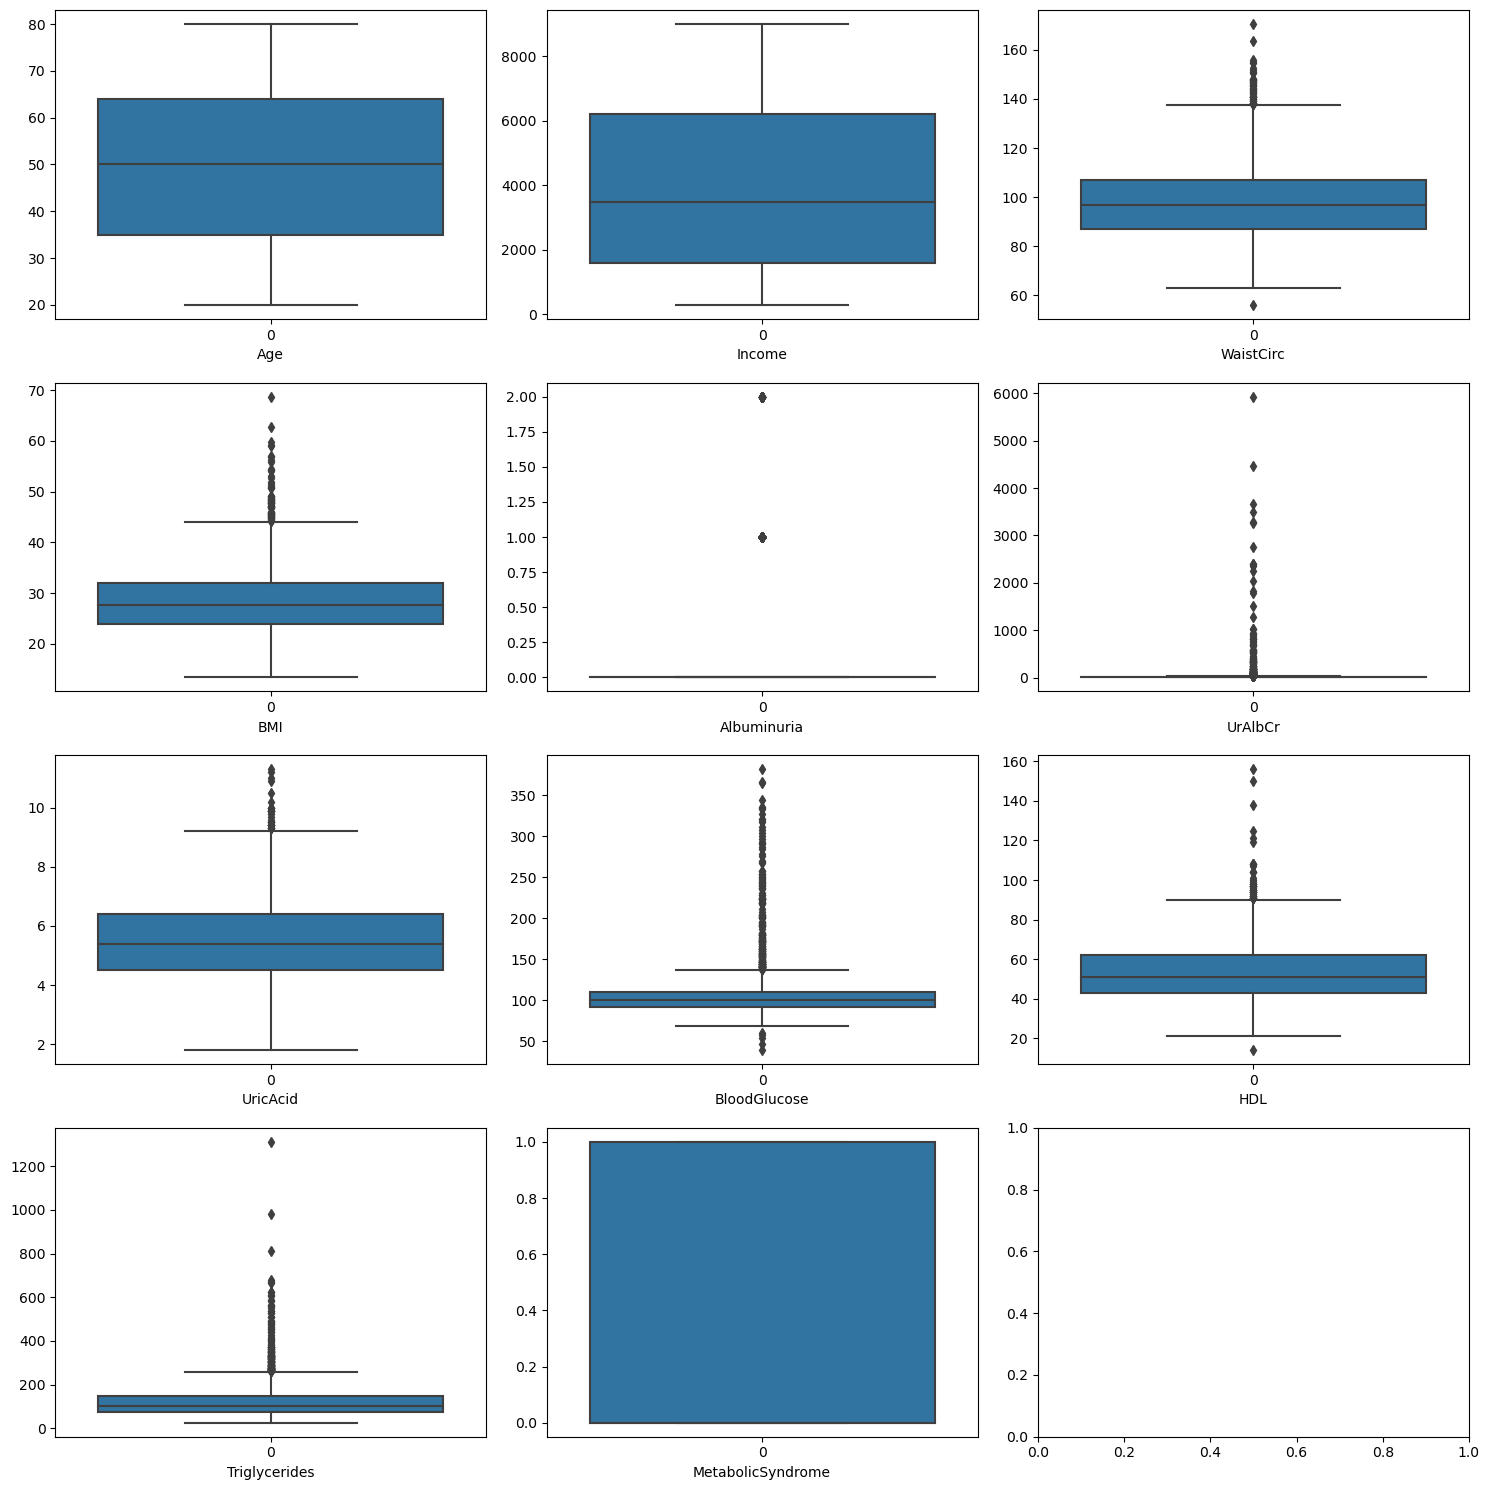

In [33]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.select_dtypes(include=['number']).columns):
    sns.boxplot(EDA_df[column], ax=ax)
    #ax.set_title(column)
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

* The boxplot seems to confirm the presence of significant outliers in the `UrAlbCr` attributes
* However, outliers in any of the attributes will not be removed at this stage. They may well represent respondents with abnormal health conditions that may be a determinant for predicting Metabolic Syndrome
* Hence, outliers will be treated at the model building stage after evaluating its results

### EDA - Bivariate

In [ ]:
Show countplots for categorical attributes

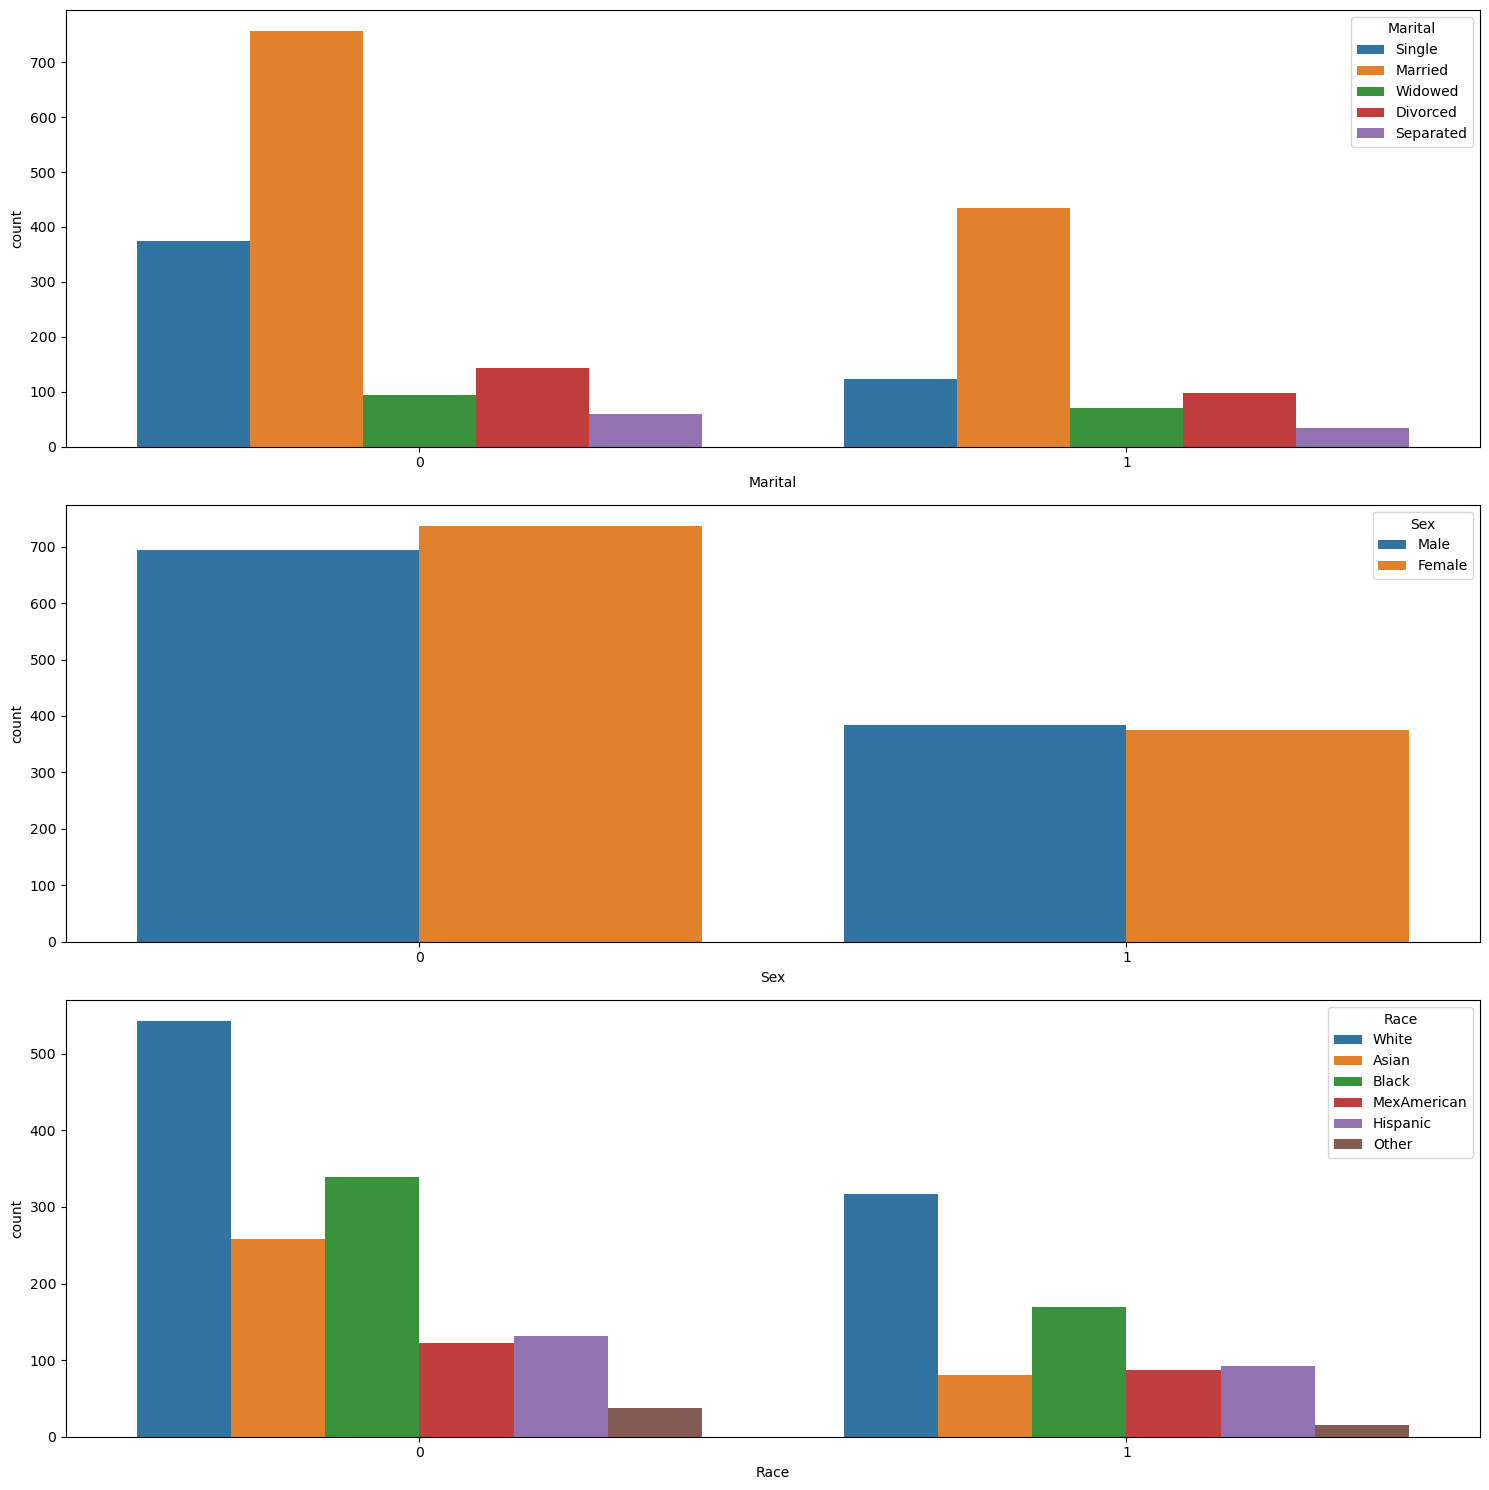

In [40]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

for ax, column in zip(axs.ravel(), ['Marital','Sex', 'Race']):
    sns.countplot(data=EDA_df,hue=column,x='MetabolicSyndrome', ax=ax)
    #ax.set_title(column)
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

* We can observe that those with metabolic syndrome are split evenly between males and females, but unevenly across race and marital status
* However, because those of certain races and respondents with certain marital statuses are a larger proportion of the sample, we cannot make definite conclusions
* Hence, in the next cells, we would try to normalize for proportion of the respondents.

In [43]:
# Calculate the percentage of respondent with a True value of a binary attribute for each category
def category_proportion(binary_attribute, category, dataframe):
    total = dataframe.groupby(category).size()
    with_syndrome = dataframe[dataframe[binary_attribute] == 1].groupby(category).size()
    proportion = with_syndrome / total

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=proportion.index, y=proportion.values)
    plt.ylabel(f'Proportion with {binary_attribute}')
    plt.show()

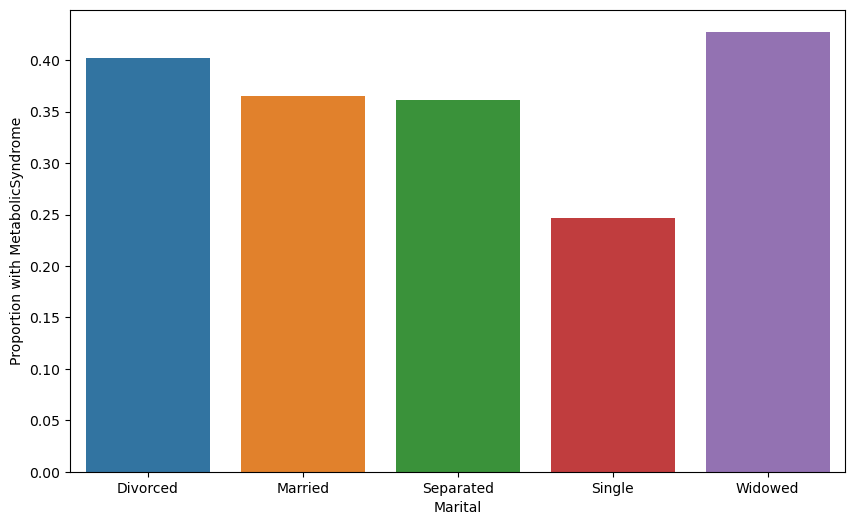

In [45]:
category_proportion('MetabolicSyndrome','Marital',EDA_df)

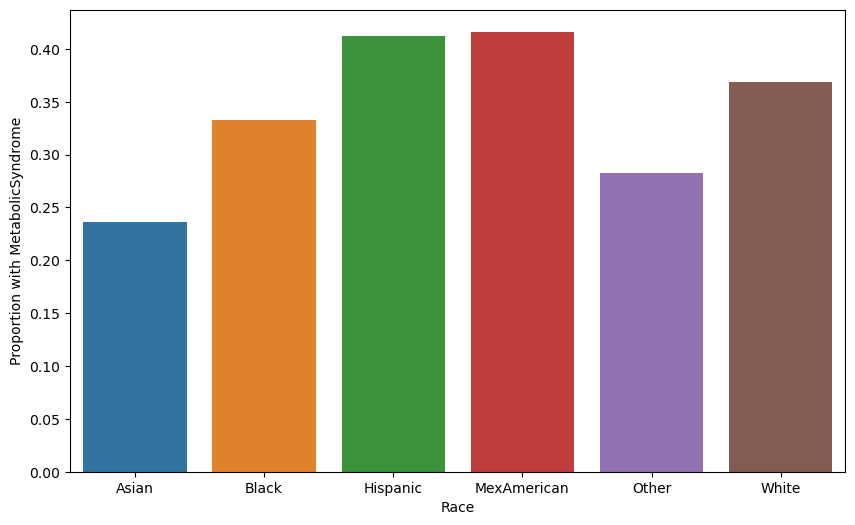

In [46]:
category_proportion('MetabolicSyndrome','Race',EDA_df)

* Now we get a clearer sense of the occurrence of metabolic syndrome across race and marital status
* From the plots, it seems single respondents and those with Asian origin seem to be less likely to have metabolic syndrome
* It would be worthwhile to check the statistical significance of these observations in the hypothesis testing section.

### EDA - Multivariate

The ultimate aim in this project is to understand the factors that determine the presence of Metabolic Syndrome. As such, we would like to see, at a high level, how the various other attributes relate to it. We would by viewing the correlations between variables

In [74]:
numeric = EDA_df[EDA_df.select_dtypes(include=['number']).columns]

In [75]:
numeric.corr()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
Age,1.000000,-0.040080,0.226070,0.084954,0.233637,0.116788,0.150492,0.246075,0.058459,0.079931,0.252945
Income,-0.040080,1.000000,-0.075001,-0.092227,-0.109471,-0.051029,0.004823,-0.097388,0.076139,-0.033945,-0.094972
WaistCirc,0.226070,-0.075001,1.000000,0.886620,0.115552,0.040897,0.350842,0.266573,-0.353346,0.248785,0.488104
BMI,0.084954,-0.092227,0.886620,1.000000,0.073528,0.040332,0.275489,0.220738,-0.293927,0.176622,0.426407
Albuminuria,0.233637,-0.109471,0.115552,0.073528,1.000000,0.538724,0.180975,0.209618,-0.022758,0.124353,0.154154
UrAlbCr,0.116788,-0.051029,0.040897,0.040332,0.538724,1.000000,0.133916,0.111631,0.001799,0.087110,0.084438
UricAcid,0.150492,0.004823,0.350842,0.275489,0.180975,0.133916,1.000000,0.066152,-0.259366,0.216170,0.254577
BloodGlucose,0.246075,-0.097388,0.266573,0.220738,0.209618,0.111631,0.066152,1.000000,-0.211629,0.286642,0.359706
HDL,0.058459,0.076139,-0.353346,-0.293927,-0.022758,0.001799,-0.259366,-0.211629,1.000000,-0.393512,-0.369206
Triglycerides,0.079931,-0.033945,0.248785,0.176622,0.124353,0.087110,0.216170,0.286642,-0.393512,1.000000,0.438026


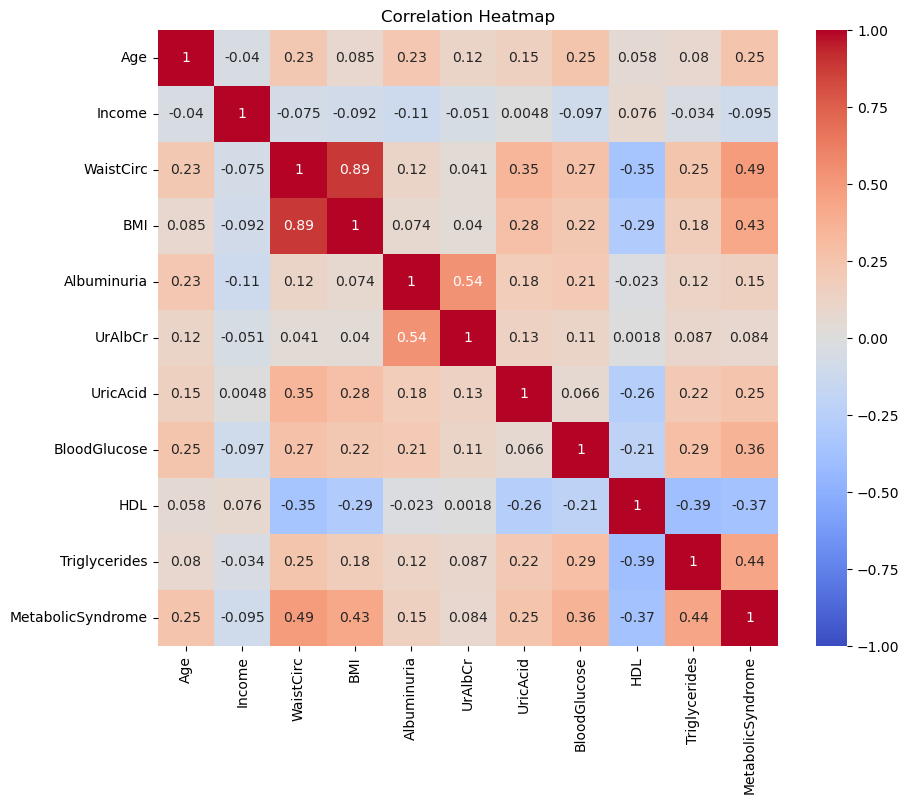

In [76]:
# Calculate correlation matrix
corr = numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

It is clear that the following attributes have a meaningful correlation with the presence of metabolic syndrome:
* `WaistCirc`
* `Triglycerides`
* `BMI`
* `HDL`
* `BloodGlucose`
* `Age`
* `UricAcid`
Among these, the first three attributes `WaistCirc`, `Triglycerides`, and `BMI` seem to show the strongest correlation. These three attributes would be explored further in relation with the categorical variables.

#### 1. Marital Status

Let us start by viewing the relationship within the marital status categorical classification. We would explore the `Age` and `Income` attributes for this category to get a feel of them, but this would not be explored for subsequent categories.

A. Marital Status, Age, and Metabolic Syndrome

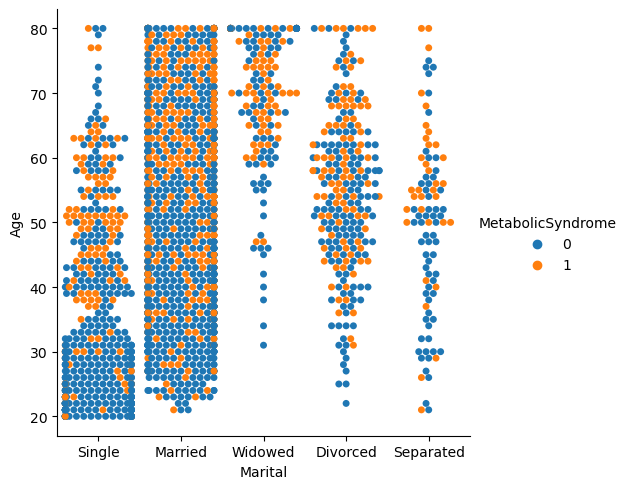

In [68]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
sns.catplot(data=EDA_df, kind="swarm", x="Marital", y="Age",hue='MetabolicSyndrome')
plt.show()

* Single respondents are predominantly young
* Widowed respondents are predominantly older, while married respondents are more uniformly distributed across age groups

In [69]:
def multi_category_proportion(binary_attribute, category, numerical_attribute, dataframe):
    n = 6
    temp_string = f'{numerical_attribute} Bin'
    dataframe[temp_string] = pd.qcut(EDA_df[numerical_attribute], q=n)

    # Calculate proportions for each bin and race
    grouped = dataframe.groupby([temp_string, category]).agg({binary_attribute: np.mean}).reset_index()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=grouped, x=temp_string, y=binary_attribute, hue=category)
    plt.title(f'Proportion of {binary_attribute} by {numerical_attribute} and {category}')
    plt.ylabel(f'Proportion with {binary_attribute}')
    plt.show()

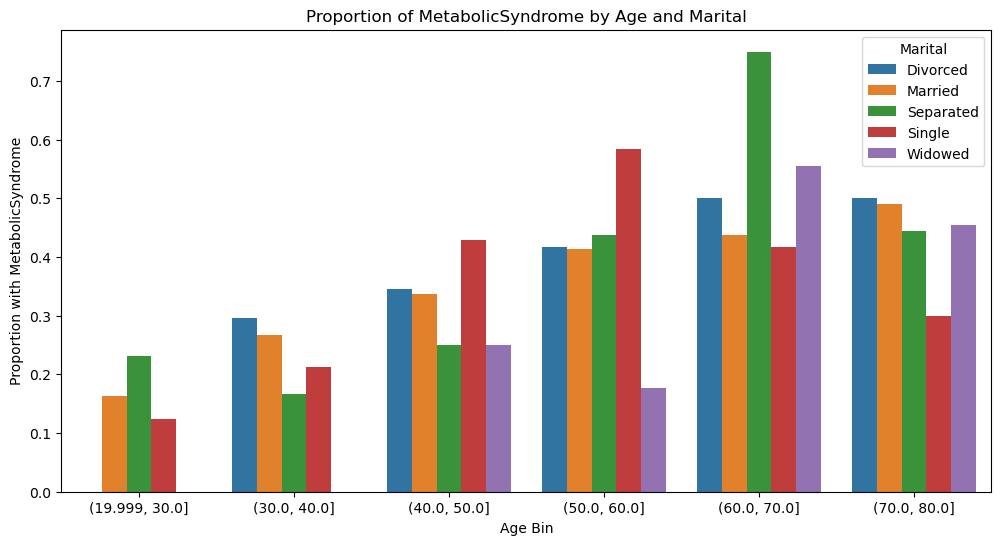

In [62]:
multi_category_proportion('MetabolicSyndrome','Marital','Age',EDA_df.copy())

Observations:
* Overall, older respondents seem to be more likely to have metabolic syndrome
* Across age groups, there is no marked difference between marital status

B. Marital status, Income, and Metabolic Syndrome

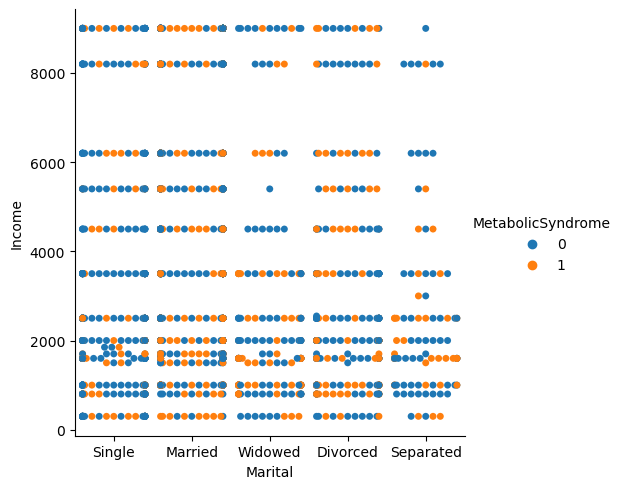

In [70]:
sns.catplot(data=EDA_df, kind="swarm", x="Marital", y="Income",hue='MetabolicSyndrome')
plt.show()

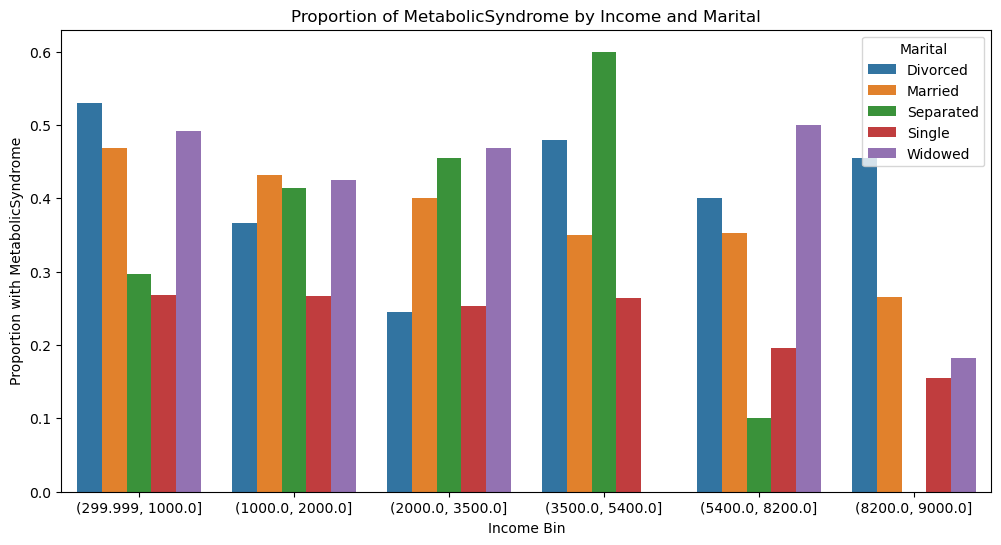

In [71]:
multi_category_proportion('MetabolicSyndrome','Marital','Income',EDA_df.copy())

* No clear pattern between `Income` and marital status. 
* It seems like separated respondent with high income are less susceptible to metabolic syndrome. The caveat is that datapoints for very specific grouping might be few

In [72]:
EDA_df.columns

Index(['Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome', 'Age Bin'],
      dtype='object')

C. Marital status, WaistCirc, and Metabolic Syndrome

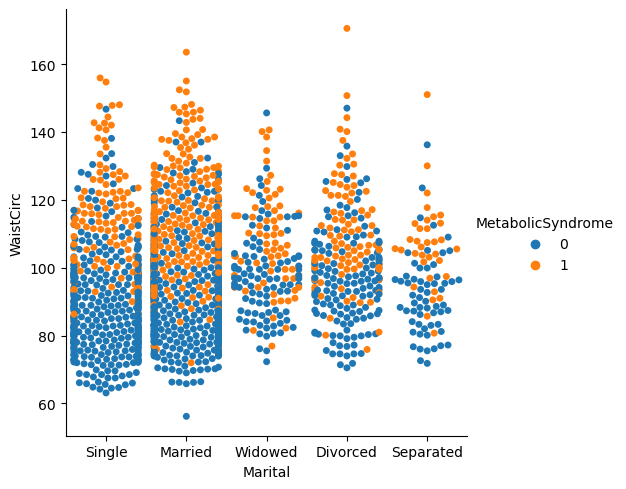

In [73]:
sns.catplot(data=EDA_df, kind="swarm", x="Marital", y="WaistCirc",hue='MetabolicSyndrome')
plt.show()

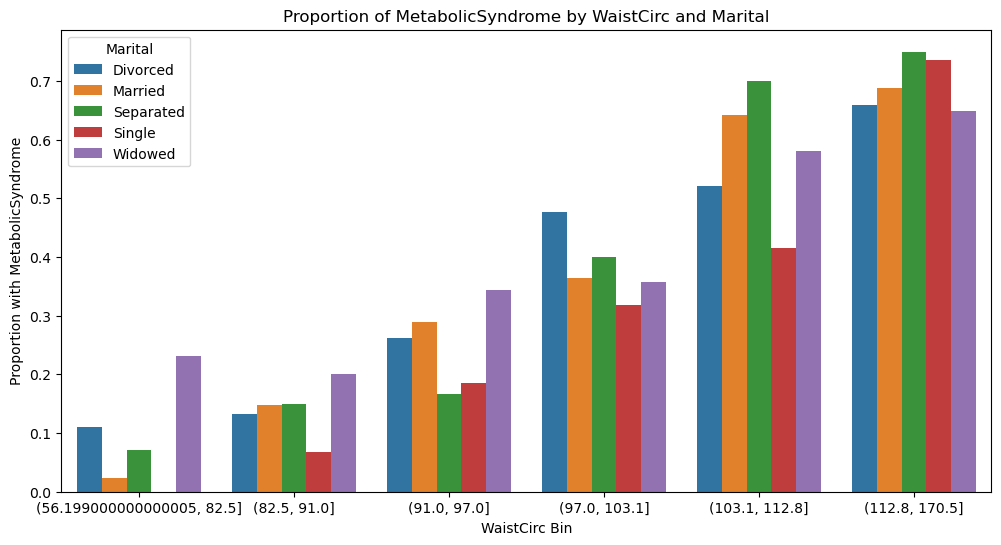

In [77]:
multi_category_proportion('MetabolicSyndrome','Marital','WaistCirc',EDA_df.copy())

* No clear-cut pattern stands out

D. Marital status, Triglycerides, and Metabolic Syndrome

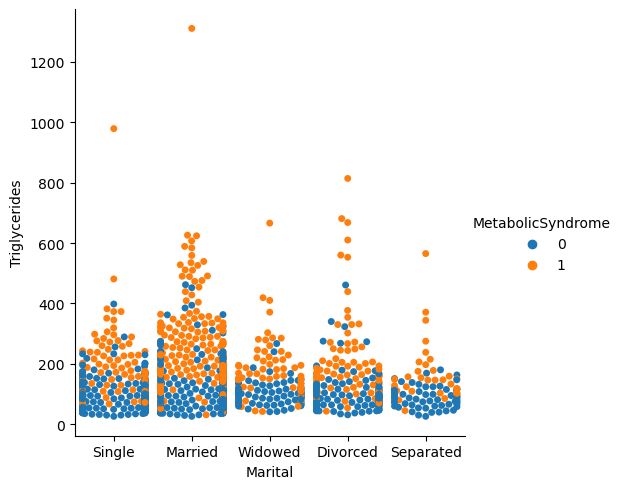

In [79]:
attribute = 'Triglycerides'
sns.catplot(data=EDA_df, kind="swarm", x="Marital", y=attribute,hue='MetabolicSyndrome')
plt.show()

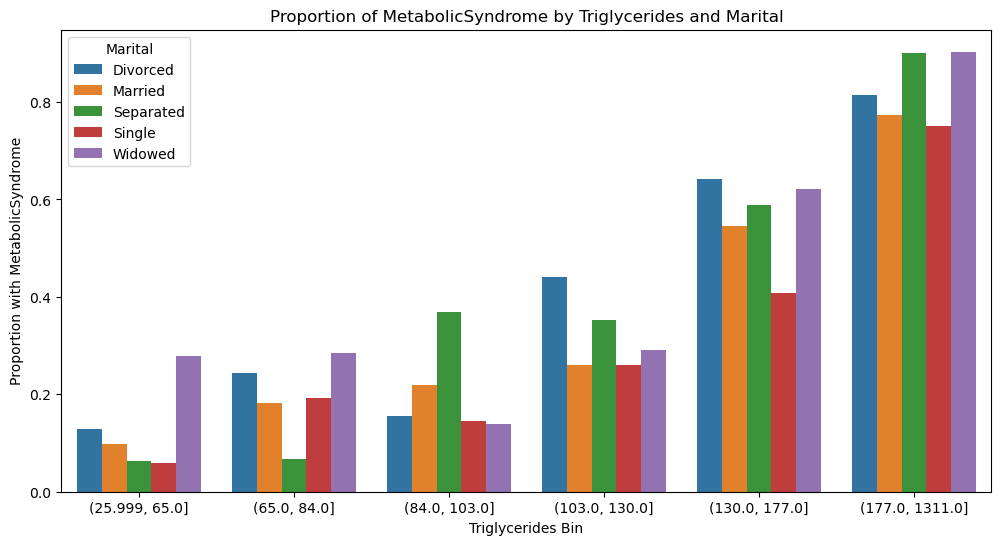

In [80]:
multi_category_proportion('MetabolicSyndrome','Marital',attribute,EDA_df.copy())

* No clear patterns to note. The presence of significant outliers for `Triglycerides` is worth noting

E. Marital status, BMI, and Metabolic Syndrome

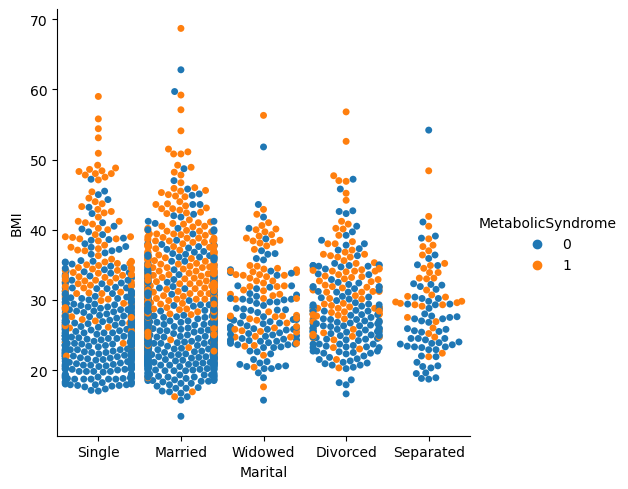

In [81]:
attribute ='BMI'
sns.catplot(data=EDA_df, kind="swarm", x="Marital", y=attribute,hue='MetabolicSyndrome')
plt.show()

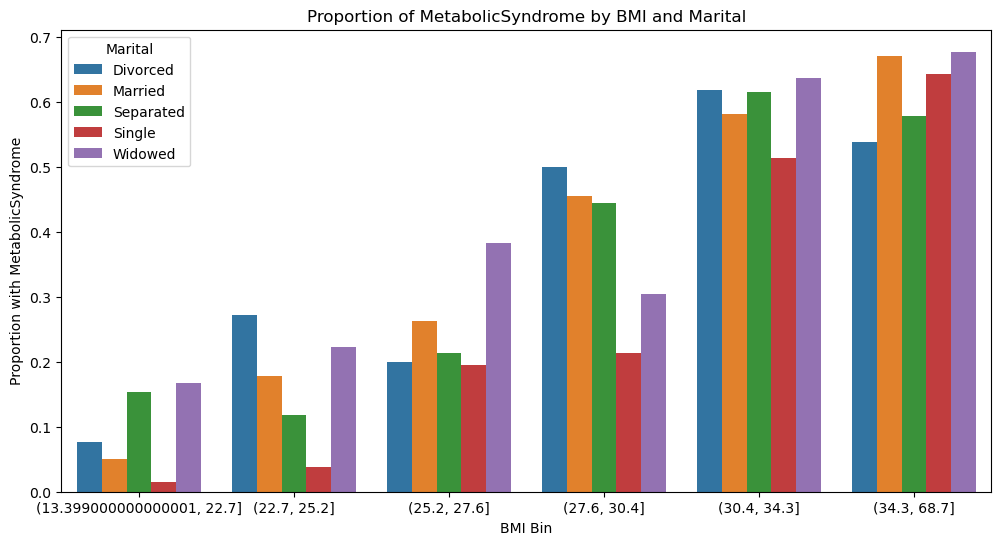

In [82]:
multi_category_proportion('MetabolicSyndrome','Marital',attribute,EDA_df.copy())

#### 2. Sex

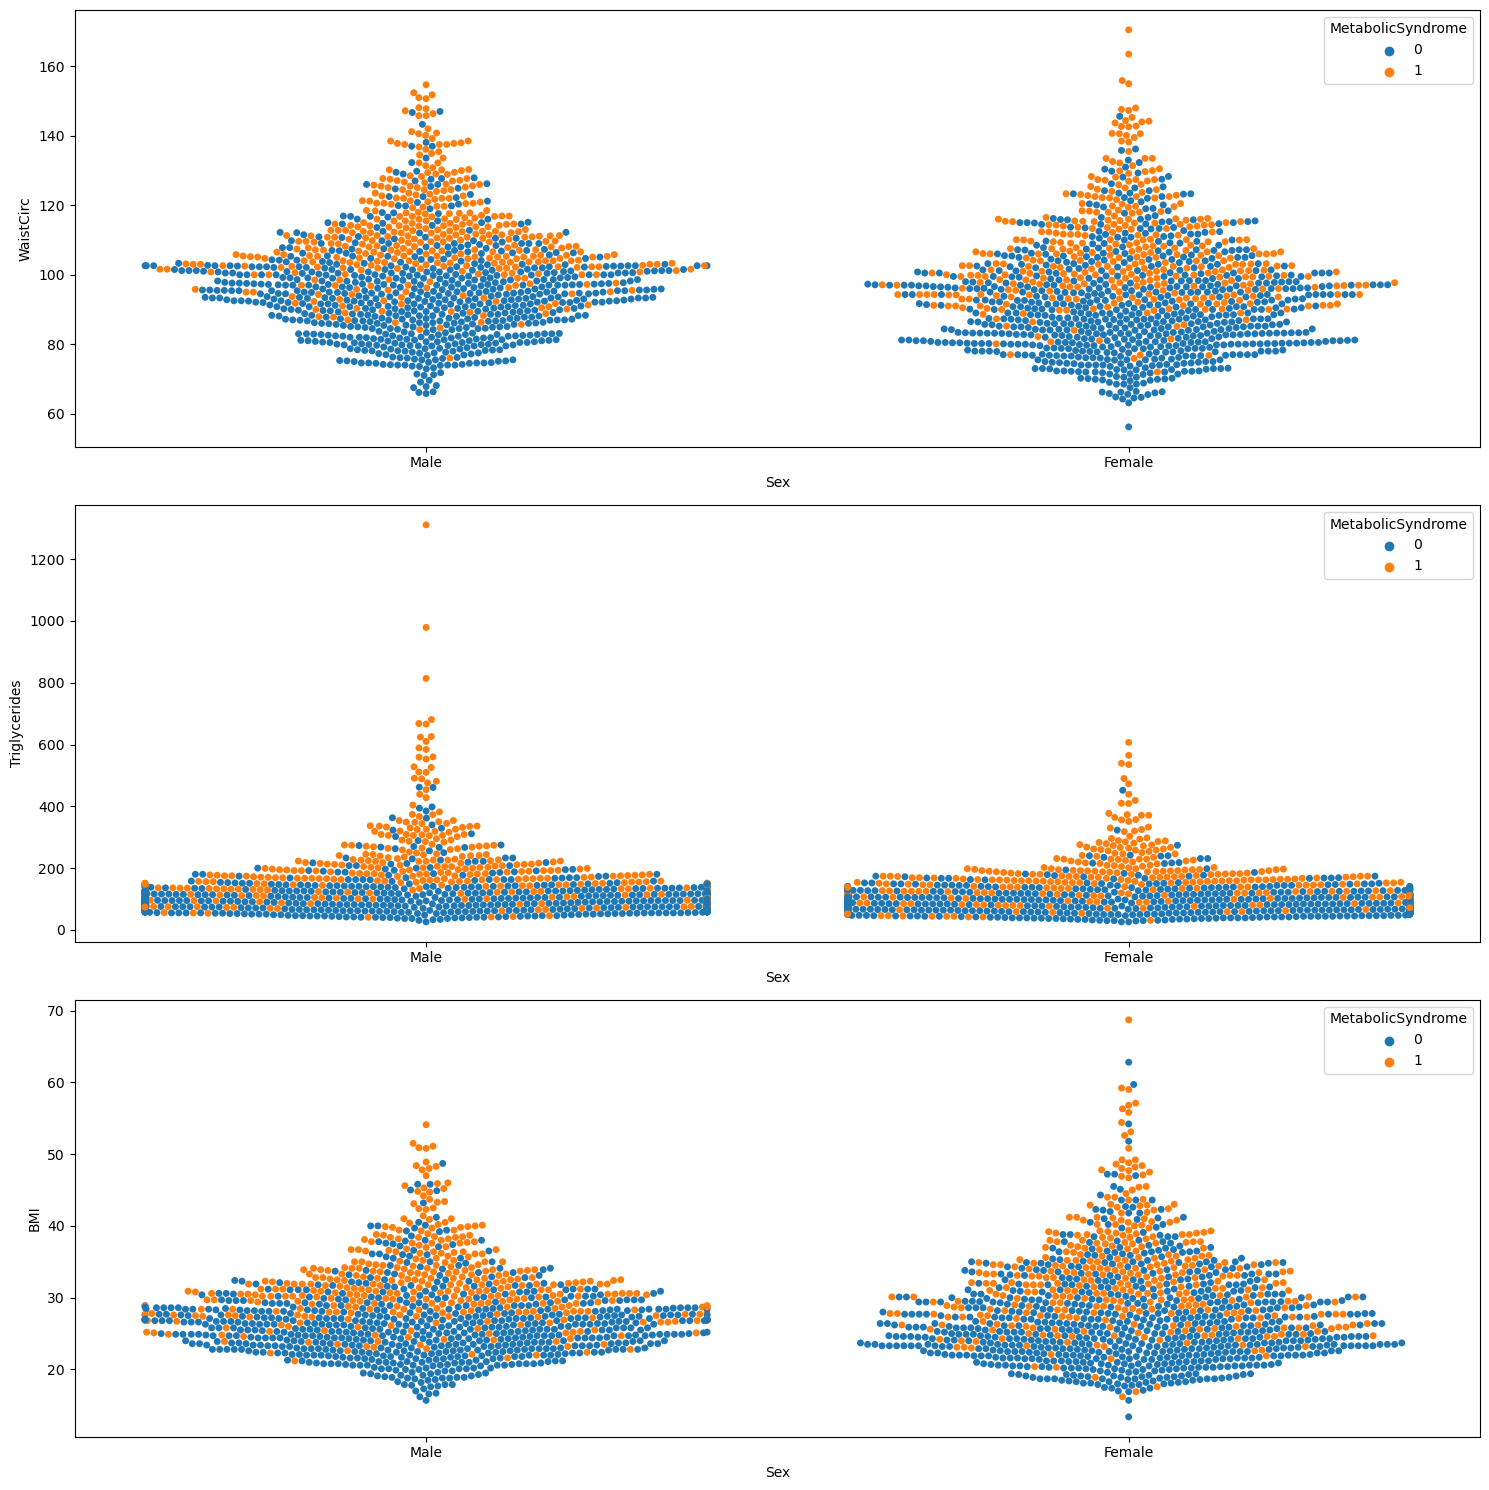

In [90]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

for ax, attribute in zip(axs.ravel(), ['WaistCirc','Triglycerides', 'BMI']):
    sns.swarmplot(data=EDA_df, x="Sex", y=attribute,hue='MetabolicSyndrome',ax=ax)
    #ax.set_title(column)
    #ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [91]:
attribute_a = 'WaistCirc'
attribute_b = 'Triglycerides'
attribute_c = 'BMI'

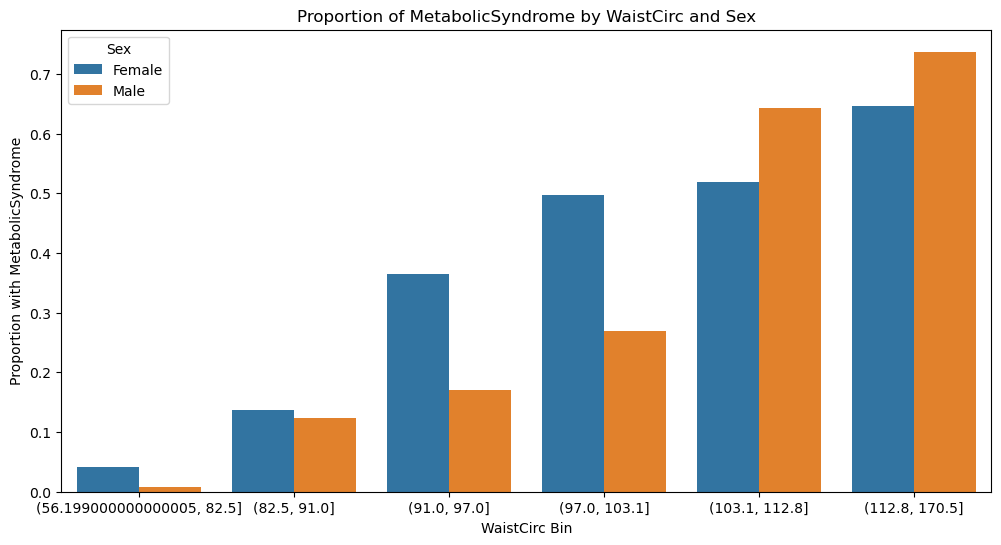

In [93]:
multi_category_proportion('MetabolicSyndrome','Sex',attribute_a,EDA_df.copy())

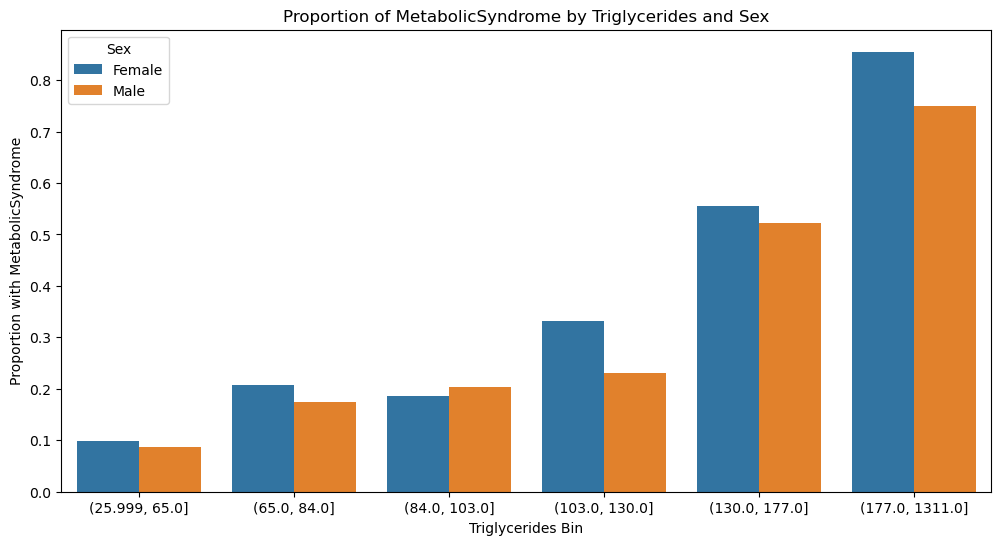

In [94]:
multi_category_proportion('MetabolicSyndrome','Sex',attribute_b,EDA_df.copy())

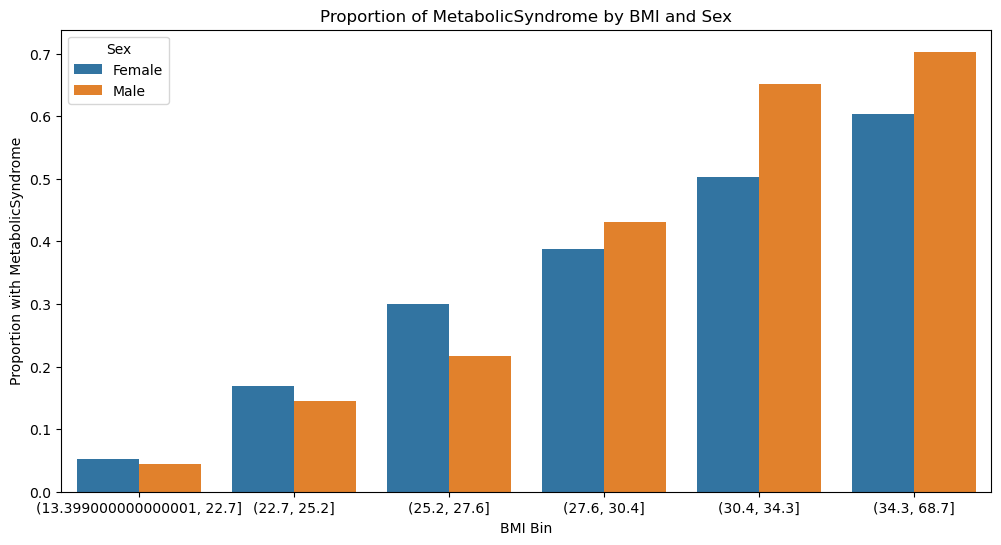

In [95]:
multi_category_proportion('MetabolicSyndrome','Sex',attribute_c,EDA_df.copy())

* It seems males with higher `WaistCirc` and `BMI` are more likely to have metabolic syndrome than females
* On the other hand, it appears that females with higher `Triglycerides` count are more likely to have metabolic syndrome

#### 3. Race

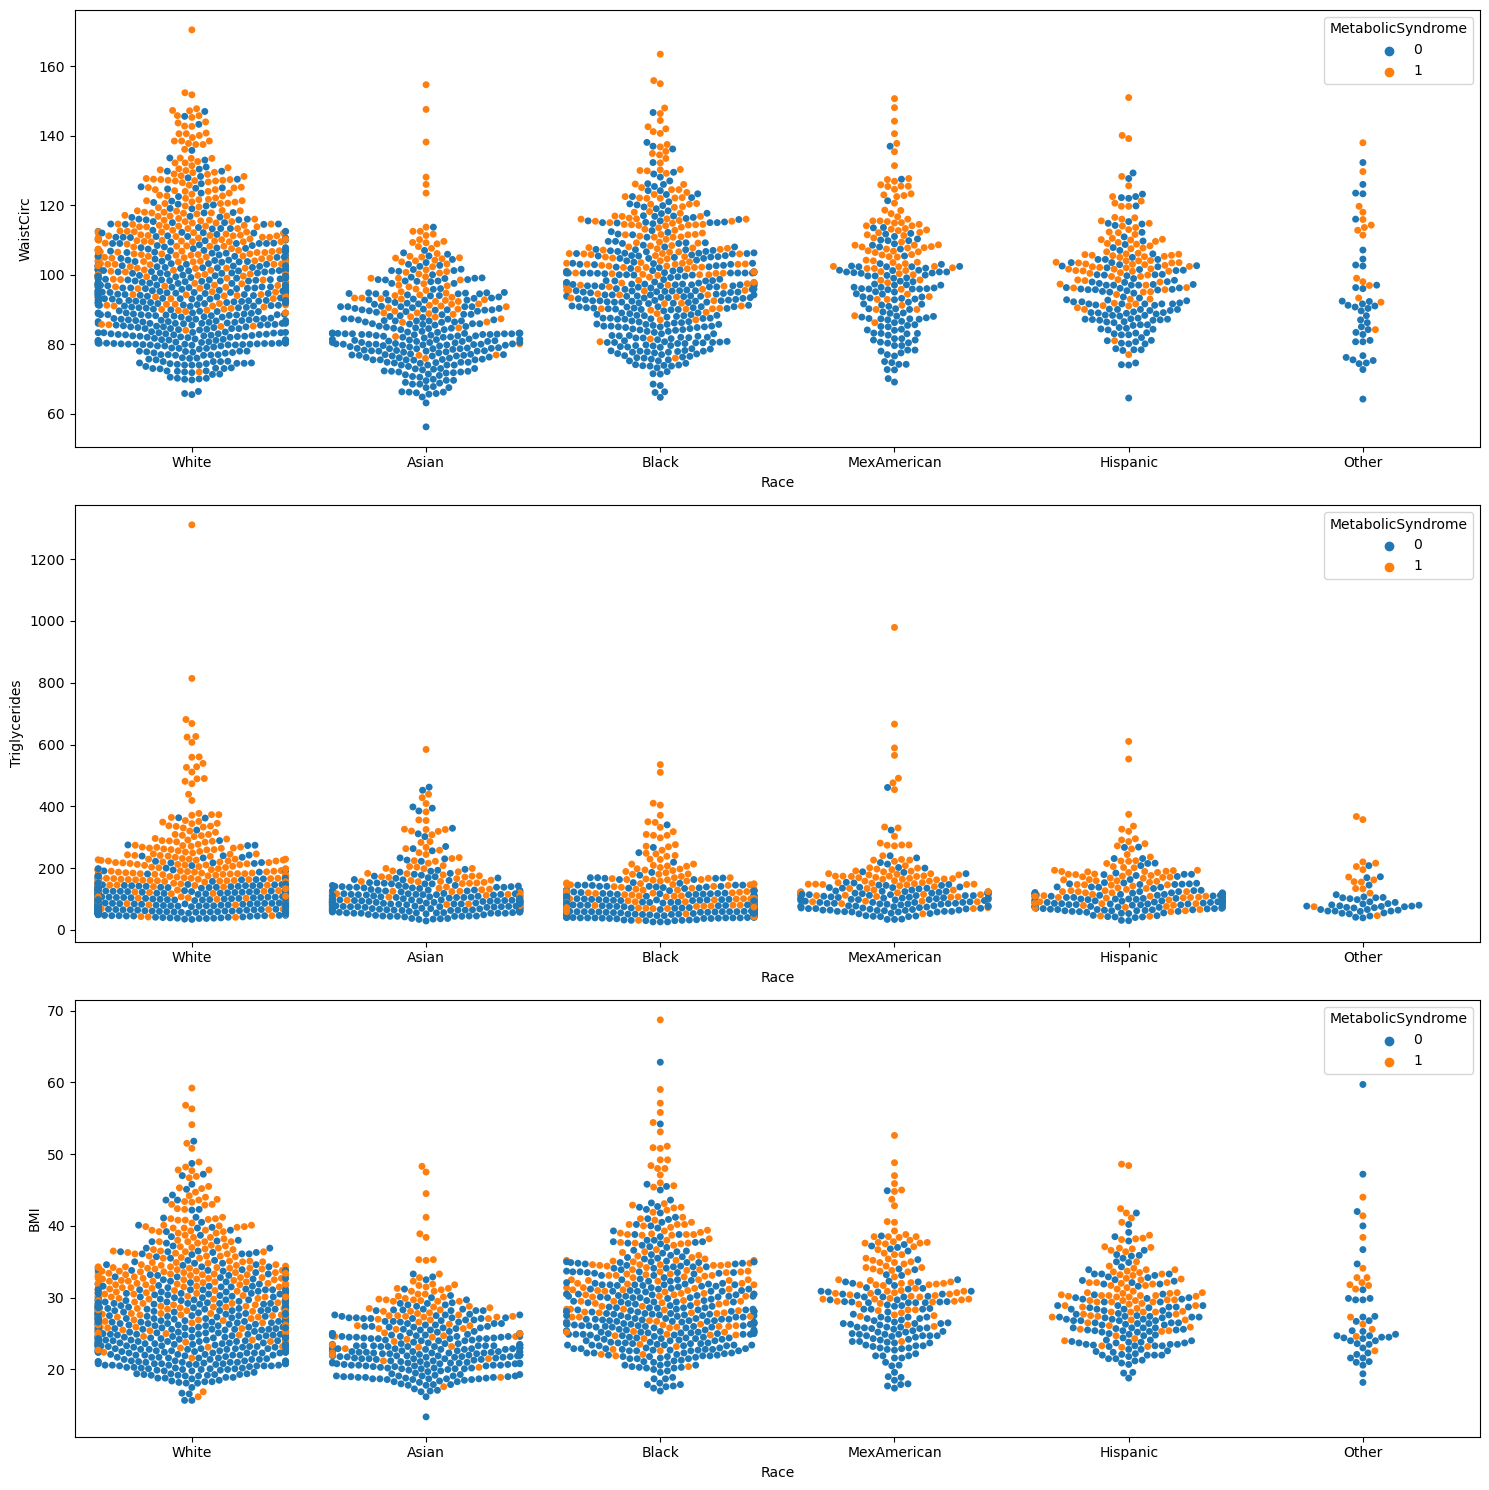

In [96]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

for ax, attribute in zip(axs.ravel(), ['WaistCirc','Triglycerides', 'BMI']):
    sns.swarmplot(data=EDA_df, x="Race", y=attribute,hue='MetabolicSyndrome',ax=ax)
    #ax.set_title(column)
    #ax.set_xlabel(column)

plt.tight_layout()
plt.show()

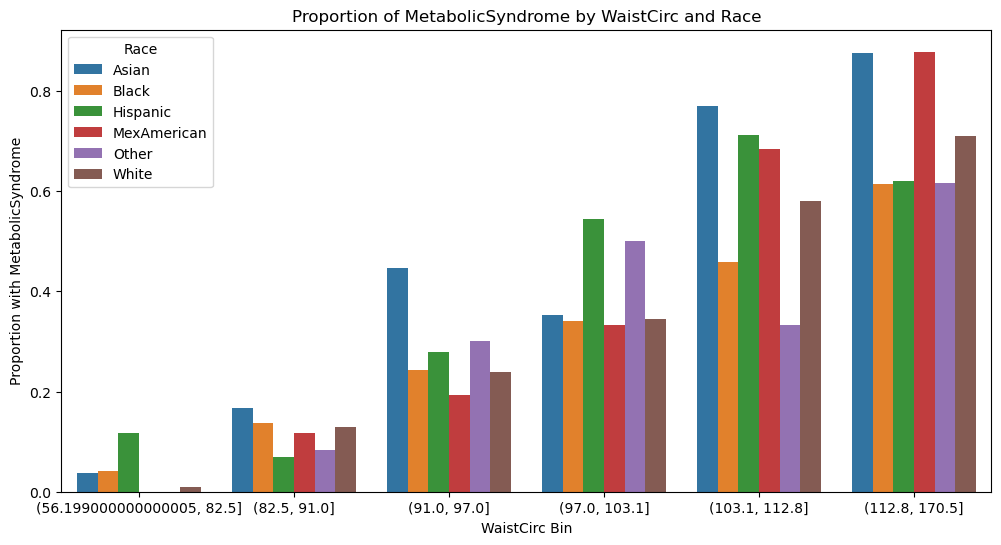

In [97]:
multi_category_proportion('MetabolicSyndrome','Race',attribute_a,EDA_df.copy())

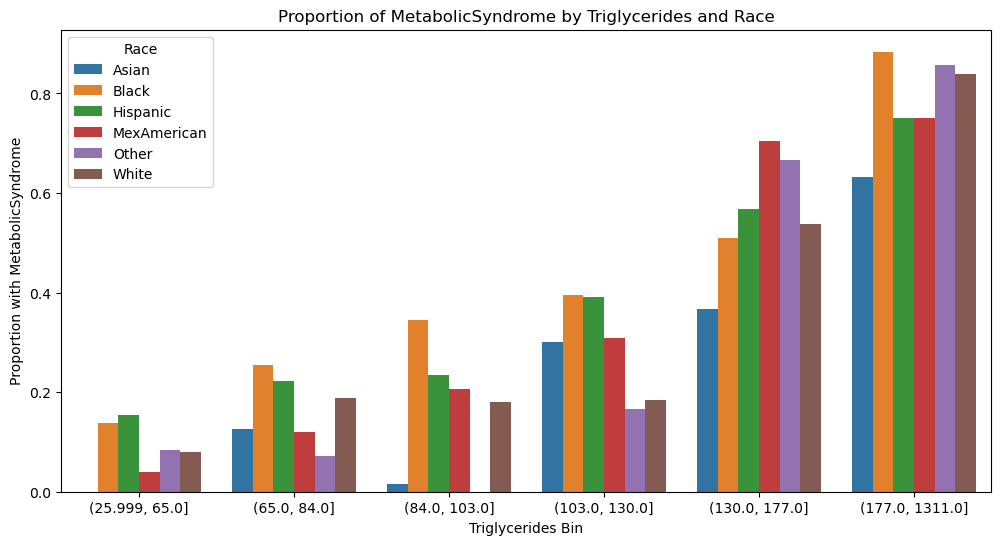

In [98]:
multi_category_proportion('MetabolicSyndrome','Race',attribute_b,EDA_df.copy())

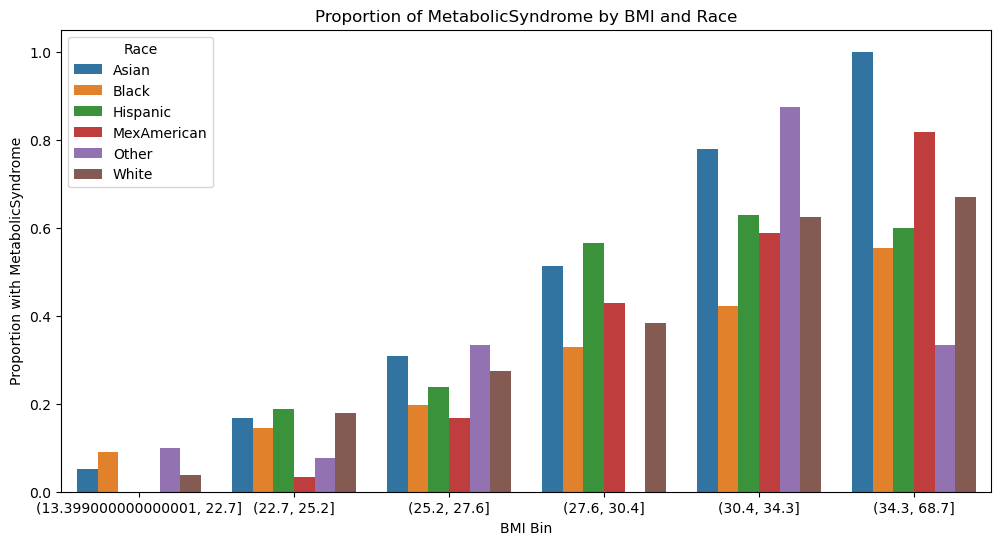

In [99]:
multi_category_proportion('MetabolicSyndrome','Race',attribute_c,EDA_df.copy())

* No clear cut pattern observed